In [3]:
#inlab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


(74.0, 67.66373831425418)

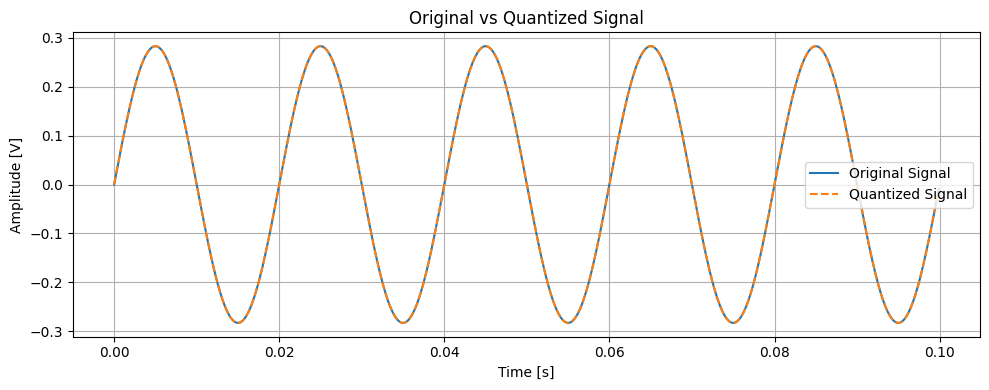

In [15]:
# Part (a) - Ideal 12-bit ADC, input signal = 200 mV RMS, ADC range = 1.2 Vpp

# Parameters
bits = 12
v_rms = 0.2  # RMS voltage in Volts
v_pp_adc = 1.2  # Full scale peak-to-peak voltage of ADC

# ADC quantization SNR for ideal N-bit ADC: SNR = 6.02*N + 1.76 dB
snr_adc_ideal_db = 6.02 * bits + 1.76

# Simulate ADC quantization and compute actual SNR
fs = 10000  # sampling frequency
t = np.arange(0, 1, 1/fs)
f_signal = 50  # frequency of the sine wave
signal = np.sqrt(2) * v_rms * np.sin(2 * np.pi * f_signal * t)  # convert RMS to peak

# Quantization
delta = v_pp_adc / (2 ** bits)  # quantization step size
quantized_signal = np.round((signal + v_pp_adc / 2) / delta) * delta - v_pp_adc / 2

# Calculate signal power and quantization noise power
signal_power = np.mean(signal**2)
noise_power = np.mean((signal - quantized_signal)**2)
snr_adc_simulated_db = 10 * np.log10(signal_power / noise_power)

# Plot original vs quantized
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], signal[:1000], label="Original Signal")
plt.plot(t[:1000], quantized_signal[:1000], label="Quantized Signal", linestyle='--')
plt.title("Original vs Quantized Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [V]")
plt.legend()
plt.grid(True)
plt.tight_layout()

snr_adc_ideal_db, snr_adc_simulated_db


(-1.55193513160311, -4.562232659131899)

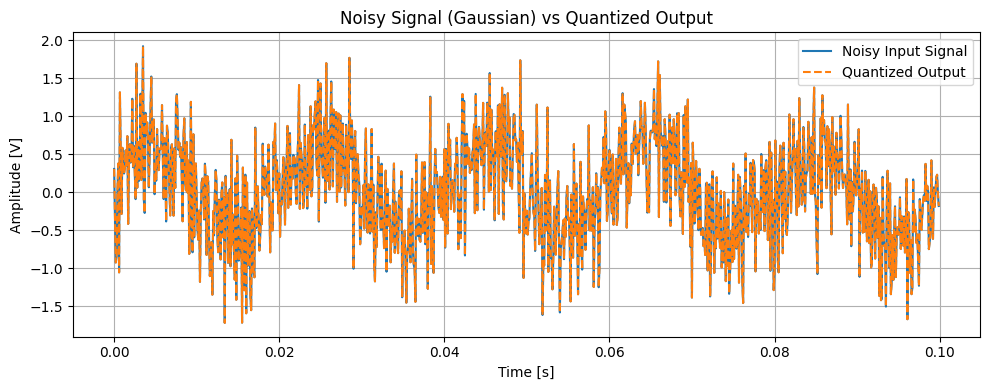

In [6]:
# Part (b) - Input signal is full range sinewave + Gaussian noise (std dev = 0.5V)

# Full range sine wave (peak = 0.6V since Vpp = 1.2V)
signal_full_range = 0.6 * np.sin(2 * np.pi * f_signal * t)

# Additive Gaussian noise with std deviation 0.5V
noise_gaussian = np.random.normal(0, 0.5, size=t.shape)
noisy_signal = signal_full_range + noise_gaussian

# Input SNR: signal power / noise power
signal_power_b = np.mean(signal_full_range**2)
noise_power_b = np.mean(noise_gaussian**2)
snr_input_db = 10 * np.log10(signal_power_b / noise_power_b)

# Quantize the noisy signal
quantized_noisy_signal = np.round((noisy_signal + v_pp_adc / 2) / delta) * delta - v_pp_adc / 2

# ADC output SNR: use quantized signal
quantization_noise_power = np.mean((signal_full_range - quantized_noisy_signal)**2)
snr_output_db = 10 * np.log10(signal_power_b / (noise_power_b + quantization_noise_power))

# Plot noisy and quantized
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], noisy_signal[:1000], label="Noisy Input Signal")
plt.plot(t[:1000], quantized_noisy_signal[:1000], label="Quantized Output", linestyle='--')
plt.title("Noisy Signal (Gaussian) vs Quantized Output")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [V]")
plt.legend()
plt.grid(True)
plt.tight_layout()

snr_input_db, snr_output_db


(3.2996619572289565, 0.2893543174650725)

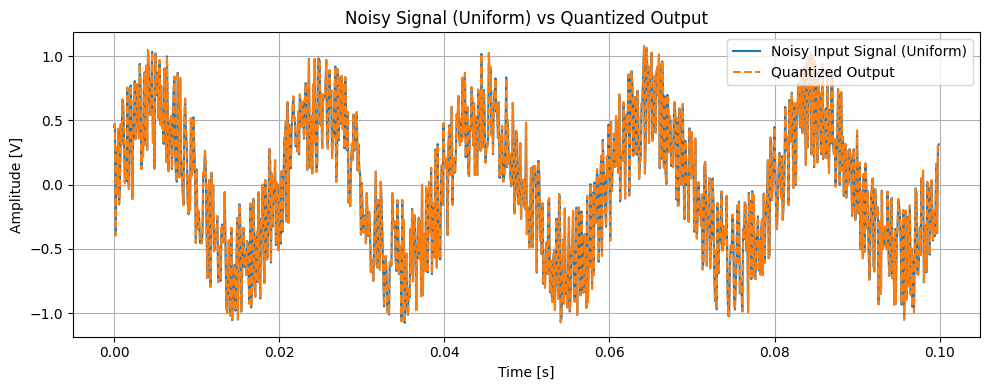

In [7]:
# Part (c) - Uniform noise with peak-to-peak value of 1V (±0.5V)

# Generate uniform noise
noise_uniform = np.random.uniform(-0.5, 0.5, size=t.shape)
noisy_signal_uniform = signal_full_range + noise_uniform

# Input SNR for uniform noise
signal_power_c = np.mean(signal_full_range**2)
noise_power_c = np.mean(noise_uniform**2)
snr_input_uniform_db = 10 * np.log10(signal_power_c / noise_power_c)

# Quantize the noisy signal with uniform noise
quantized_uniform_signal = np.round((noisy_signal_uniform + v_pp_adc / 2) / delta) * delta - v_pp_adc / 2

# ADC output SNR with uniform noise
quantization_noise_power_c = np.mean((signal_full_range - quantized_uniform_signal)**2)
snr_output_uniform_db = 10 * np.log10(signal_power_c / (noise_power_c + quantization_noise_power_c))

# Plot noisy and quantized signals
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], noisy_signal_uniform[:1000], label="Noisy Input Signal (Uniform)")
plt.plot(t[:1000], quantized_uniform_signal[:1000], label="Quantized Output", linestyle='--')
plt.title("Noisy Signal (Uniform) vs Quantized Output")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [V]")
plt.legend()
plt.grid(True)
plt.tight_layout()

snr_input_uniform_db, snr_output_uniform_db


{'Offset Error (LSB)': -0.09999999999999999,
 'Full-scale Error (LSB)': 0.49999999999999933,
 'Gain Error (LSB/code)': 0.08571428571428563,
 'Max DNL (LSB)': 0.5000000000000001,
 'Max INL (LSB)': 0.5428571428571427}

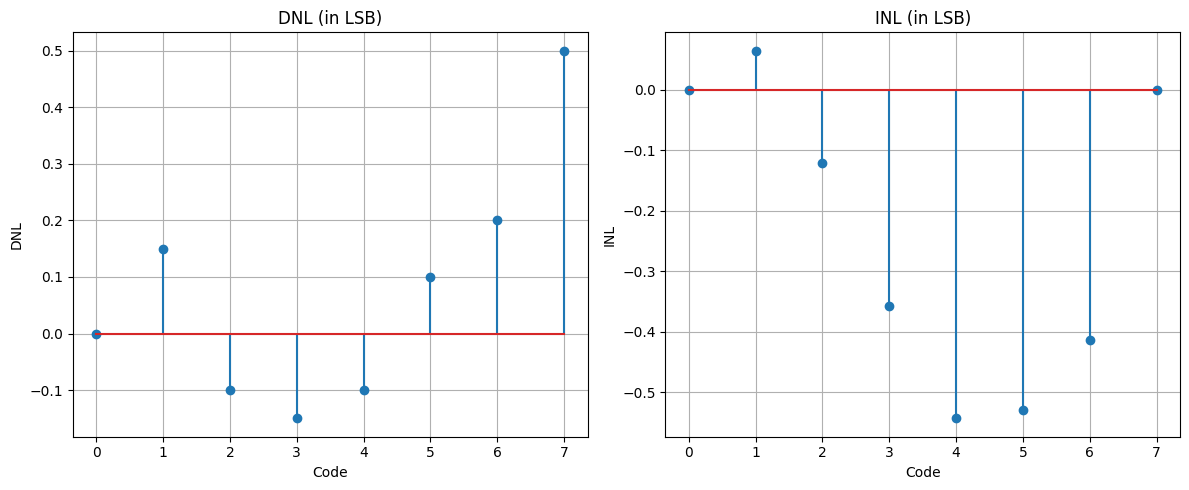

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Measured DAC output values for codes 000 to 111
measured_outputs = np.array([-0.01, 0.105, 0.195, 0.28, 0.37, 0.48, 0.6, 0.75])  # in Volts
ideal_lsb = 0.1  # Volts
num_levels = len(measured_outputs)

# Ideal DAC output (based on LSB = 0.1V and 3-bit codes)
ideal_outputs = np.arange(num_levels) * ideal_lsb

# (a) Offset and Full-scale error
offset_error_v = measured_outputs[0] - ideal_outputs[0]
offset_error_lsb = offset_error_v / ideal_lsb

fullscale_error_v = measured_outputs[-1] - ideal_outputs[-1]
fullscale_error_lsb = fullscale_error_v / ideal_lsb

# (b) Endpoint ideal and actual gain
ideal_gain = (ideal_outputs[-1] - ideal_outputs[0]) / (num_levels - 1)
actual_gain = (measured_outputs[-1] - measured_outputs[0]) / (num_levels - 1)
gain_error = actual_gain - ideal_gain
gain_error_lsb_per_code = gain_error / ideal_lsb

# (c) End-point corrected ideal values
corrected_ideal = offset_error_v + np.arange(num_levels) * actual_gain

# DNL and INL
step_sizes = np.diff(measured_outputs)
ideal_step = ideal_lsb
dnl = np.zeros(num_levels)
dnl[1:] = (step_sizes - ideal_step) / ideal_lsb

inl = (measured_outputs - corrected_ideal) / ideal_lsb

# (d) Max DNL and INL
max_dnl = np.max(np.abs(dnl))
max_inl = np.max(np.abs(inl))

# Plot DNL and INL
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(range(num_levels), dnl)
plt.title("DNL (in LSB)")
plt.xlabel("Code")
plt.ylabel("DNL")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(range(num_levels), inl)
plt.title("INL (in LSB)")
plt.xlabel("Code")
plt.ylabel("INL")
plt.grid(True)

plt.tight_layout()

{
    "Offset Error (LSB)": offset_error_lsb,
    "Full-scale Error (LSB)": fullscale_error_lsb,
    "Gain Error (LSB/code)": gain_error_lsb_per_code,
    "Max DNL (LSB)": max_dnl,
    "Max INL (LSB)": max_inl
}


In [13]:
#Given histogram
H = np.array([43, 115, 85, 101, 122, 170, 75, 146, 125, 60, 95, 95, 115, 40, 120, 242])

# Average count per code
H_avg = np.mean(H)

# DNL and INL calculations
DNL = (H - H_avg) / H_avg
INL = np.cumsum(DNL)

# Peak DNL and INL
peak_DNL = np.max(np.abs(DNL))
peak_INL = np.max(np.abs(INL))

# Check for monotonicity: DNL must be > -1 for all codes
is_monotonic = np.all(DNL > -1)

DNL, INL, peak_DNL, peak_INL, is_monotonic

(array([-0.60663236,  0.05202973, -0.22241281, -0.07604345,  0.11606632,
         0.55517439, -0.31389365,  0.33562035,  0.14351058, -0.45111492,
        -0.13093196, -0.13093196,  0.05202973, -0.63407662,  0.09777015,
         1.21383648]),
 array([-6.06632361e-01, -5.54602630e-01, -7.77015437e-01, -8.53058891e-01,
        -7.36992567e-01, -1.81818182e-01, -4.95711835e-01, -1.60091481e-01,
        -1.65809034e-02, -4.67695826e-01, -5.98627787e-01, -7.29559748e-01,
        -6.77530017e-01, -1.31160663e+00, -1.21383648e+00,  2.22044605e-16]),
 1.2138364779874213,
 1.3116066323613491,
 True)

INL: [-0.5 -1.  -1.  -0.5 -1.5 -1.  -0.5  0. ]


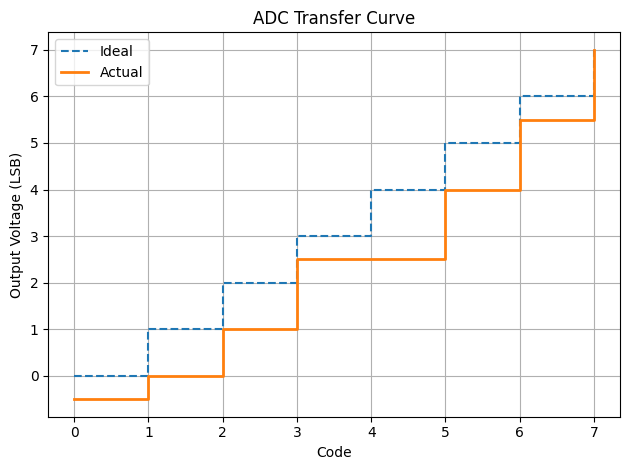

In [14]:
DNL = np.array([0, -0.5, 0, 0.5, -1, 0.5, 0.5, 0])
offset_error = 0.5  # LSB
full_scale_error = 0.5  # LSB

# Step 1: Calculate raw INL from DNL
INL_raw = np.cumsum(DNL)

# Step 2: Apply offset error
INL = INL_raw - offset_error

# Step 3: Add full-scale error to the last point
INL[-1] += full_scale_error

print("INL:", INL)

codes = np.arange(8)
ideal = codes
actual = codes + INL

plt.step(codes, ideal, where='post', label='Ideal', linestyle='--')
plt.step(codes, actual, where='post', label='Actual', linewidth=2)

plt.xlabel('Code')
plt.ylabel('Output Voltage (LSB)')
plt.title('ADC Transfer Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

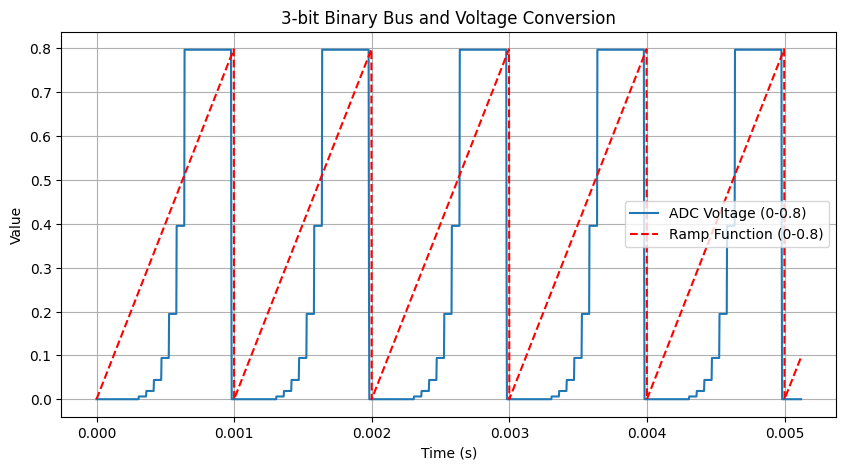

In [4]:

# Load the spreadsheet
df = pd.read_csv("acq0007.csv")

# Normalize column names by stripping spaces and converting to lowercase
df.columns = df.columns.str.strip().str.lower()

# Ensure required columns exist
if "time (s)" not in df.columns or "bus" not in df.columns:
    raise ValueError("The spreadsheet must contain 'Time (s)' and 'bus' columns.")

df = df[df["time (s)"] >= 0]
# Ensure the 'bus' column is treated as a string to avoid conversion errors
df["bus"] = df["bus"].astype(str).str.strip()

# Store original bus values before conversion
df["bus_original"] = df["bus"].copy()

# Convert valid 3-bit binary strings to voltage (0 to 1)
def binary_to_voltage(value):
    try:
        return (int(value) / 255.0)*0.8 # Scale 3-bit values (0-7) to range 0-1
    except ValueError:
        return None

df["bus"] = df["bus"].apply(binary_to_voltage)

# Drop rows with invalid data
df = df.dropna()


# Define the parameters
frequency = 1000  # 1 kHz
sampling_rate = 10000  # 10 kHz (to sample the signal properly)
duration = 0.01  # 1 second duration
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the ramp function
# ramp_signal = np.linspace(0, 0.8, int(sampling_rate / frequency), endpoint=False)
# ramp_signal = np.tile(ramp_signal, int(len(df) / len(ramp_signal)))  # Repeat to match df length

# Ensure ramp_signal has the same length as df
df["ramp"] = (df["time (s)"] % 0.001) * (0.8 / 0.001)  # Scale to 0-0.8 range

plt.figure(figsize=(10, 5))
plt.plot(df["time (s)"], df["bus"],  linestyle='-', label="ADC Voltage (0-0.8)")
plt.plot(df["time (s)"], df["ramp"], linestyle='--', color='r', label="Ramp Function (0-0.8)")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("3-bit Binary Bus and Voltage Conversion")
plt.legend()
plt.grid()
plt.show()




Offset Error     : 0.1460 V
Full-Scale Error : -0.3660 V
Linear Gain Error: -85.33%
Peak DNL         : 3.41 LSB
Peak INL         : 5.14 LSB


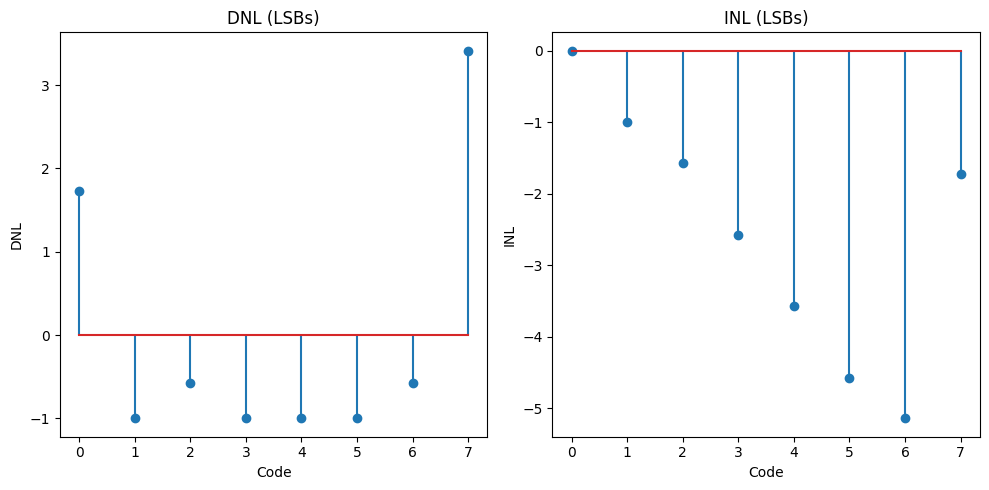

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Histogram of ADC codes
adc_codes = (df["bus"] * (255.0 / 0.8)).round().astype(int)
adc_codes = adc_codes.clip(lower=0, upper=7)  # 3-bit range
hist, _ = np.histogram(adc_codes, bins=np.arange(9))

# Normalize ramp input (0 to 1)
ramp_input = df["ramp"] / 0.8  # normalized
digital_output = adc_codes

# OFFSET ERROR: Difference between ideal and actual transition from 0 to 1
# Full-scale input corresponds to digital code = 7
transition_levels = []
for code in range(1, 8):  # transitions occur at boundaries between codes
    indices = np.where(digital_output == code)[0]
    if len(indices) > 0:
        transition_time = df.iloc[indices[0]]["time (s)"]
        transition_input = df.iloc[indices[0]]["ramp"]
        transition_levels.append(transition_input)

transition_levels = np.array(transition_levels)

# Ideal transition levels for a 3-bit ADC with full range 0-0.8V
ideal_levels = np.linspace(0.8/8, 0.8*(7/8), 7)  # midpoints of each code step

# Offset error = difference at first transition (code 0 to 1)
offset_error = transition_levels[0] - ideal_levels[0]

# Full-scale error = difference at final transition (code 6 to 7)
full_scale_error = transition_levels[-1] - ideal_levels[-1]

# Linear Gain Error (based on slope deviation)
ideal_slope = (ideal_levels[-1] - ideal_levels[0]) / 6
actual_slope = (transition_levels[-1] - transition_levels[0]) / 6
linear_gain_error = (actual_slope - ideal_slope) / ideal_slope

# DNL Calculation
ideal_count = np.mean(hist)
dnl = (hist - ideal_count) / ideal_count

# INL Calculation
inl = np.cumsum(dnl)
inl = inl - inl[0]  # normalize to start from 0

# Print the results
print(f"Offset Error     : {offset_error:.4f} V")
print(f"Full-Scale Error : {full_scale_error:.4f} V")
print(f"Linear Gain Error: {linear_gain_error*100:.2f}%")
print(f"Peak DNL         : {np.max(np.abs(dnl)):.2f} LSB")
print(f"Peak INL         : {np.max(np.abs(inl)):.2f} LSB")

# Plot DNL and INL
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.stem(range(8), dnl)
plt.title("DNL (LSBs)")
plt.xlabel("Code")
plt.ylabel("DNL")

plt.subplot(1, 2, 2)
plt.stem(range(8), inl)
plt.title("INL (LSBs)")
plt.xlabel("Code")
plt.ylabel("INL")

plt.tight_layout()
plt.show()


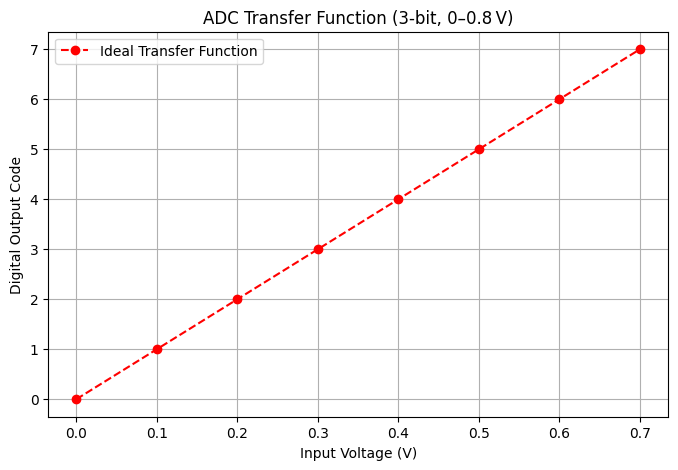

Code 0: Ideal = 0.00 V
Code 1: Ideal = 0.10 V
Code 2: Ideal = 0.20 V
Code 3: Ideal = 0.30 V
Code 4: Ideal = 0.40 V
Code 5: Ideal = 0.50 V
Code 6: Ideal = 0.60 V
Code 7: Ideal = 0.70 V


In [21]:
# Reuse existing df and adc_codes
# Create a mapping of actual transition voltages
transitions = {}

# Loop through each code and find the *minimum* ramp value where that code first appears
for code in range(8):
    indices = np.where(adc_codes == code)[0]
    if len(indices) > 0:
        ramp_val = df.iloc[indices[0]]["ramp"]
        transitions[code] = ramp_val
    else:
        transitions[code] = np.nan  # If missing

# Prepare data for plotting
actual_transfer = [transitions.get(i, np.nan) for i in range(8)]
ideal_transfer = [i * 0.1 for i in range(8)]  # Ideal step at every 0.1 V

# Plot actual vs ideal transfer curve
plt.figure(figsize=(8, 5))
plt.plot(ideal_transfer, range(8), 'ro--', label='Ideal Transfer Function')
plt.xlabel("Input Voltage (V)")
plt.ylabel("Digital Output Code")
plt.title("ADC Transfer Function (3-bit, 0–0.8 V)")
plt.grid()
plt.legend()
plt.show()

# Optional: Print the transitions
for code in range(8):
    print(f"Code {code}: Ideal = {ideal_transfer[code]:.2f} V")
